### Problem Set 2

In [3]:
NUM_CASES = 2000

In [4]:
#Setup
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import numpy as np

df1 = pd.read_csv('case_metadata.csv')[['caseid','case_reversed','judge_id','year','log_cites']]

#delete rows with NaN
df1 = df1[np.isfinite(df1['log_cites'])]


from random import shuffle
keep = [True] * NUM_CASES + [False] * (len(df1) - NUM_CASES)
shuffle(keep)
df1 = df1[keep]
print('Number of rows: ',len(df1))
df1.head()

Number of rows:  2000


,caseid,case_reversed,judge_id,year,log_cites
14,X3C0H6,0,150.0,1926.0,1.386294
26,X9VC00,0,2159.0,1925.0,0.693147
27,X9VC1K,0,2159.0,1925.0,1.609438
28,X3CETE,0,37.0,1926.0,2.302585
29,X3CEDR,0,1024.0,1926.0,0.693147


In [5]:
# load text documents
tmp=[]
for i in range(len(df1)):
    caseid=df1.iloc[i][0]
    caseid=caseid+'.txt'
    txt_file = [f for f in os.listdir('cases/') if f.endswith(caseid)]
    path='cases/'+txt_file[0]
    txt = open(path, 'r').read() # open a document
    tmp.append(txt)
df1['text']=tmp
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ..."
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil..."
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr..."
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ..."
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,..."


In [6]:
# Capitalization
def capitalization(doc):
    return doc.lower()
df1['doc'] = df1['text'].apply(capitalization) # go to lower-case
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...","bingham , circuit judge.\nthe defendant lee, ..."
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...","walker , circuit judge.\nthe owner of the oil..."
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...","walker , circuit judge.\nthis is an appeal fr..."
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...","anderson , circuit judge.\non an information ..."
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...","[**315] james , district judge.\nthis appeal,..."


In [7]:
#####
# Punctuation
#####

# recipe for fast punctuation removal
from string import punctuation

def remove_punctuation(doc):
    translator = str.maketrans('','',punctuation) 
    return doc.translate(translator)

df1['doc'] = df1['doc'].apply(remove_punctuation)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...",bingham circuit judge\nthe defendant lee wit...
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...",walker circuit judge\nthe owner of the oil t...
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...",walker circuit judge\nthis is an appeal from...
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...",anderson circuit judge\non an information in...
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...",315 james district judge\nthis appeal taken ...


In [8]:
# Tokens
def tokenize(doc):
    return doc.split()
df1['doc'] = df1['doc'].apply(tokenize)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...","[bingham, circuit, judge, the, defendant, lee,..."
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...","[walker, circuit, judge, the, owner, of, the, ..."
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...","[walker, circuit, judge, this, is, an, appeal,..."
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...","[anderson, circuit, judge, on, an, information..."
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...","[315, james, district, judge, this, appeal, ta..."


In [9]:
# remove numbers (keep if not a digit)
def remove_numbers(doc):
    return [t for t in doc if not t.isdigit()]
df1['doc'] = df1['doc'].apply(remove_numbers)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...","[bingham, circuit, judge, the, defendant, lee,..."
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...","[walker, circuit, judge, the, owner, of, the, ..."
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...","[walker, circuit, judge, this, is, an, appeal,..."
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...","[anderson, circuit, judge, on, an, information..."
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...","[james, district, judge, this, appeal, taken, ..."


In [10]:
# Stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
def remove_stopwords(doc):
    return [t for t in doc if t not in stoplist]
df1['doc'] = df1['doc'].apply(remove_stopwords)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...","[bingham, circuit, judge, defendant, lee, two,..."
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...","[walker, circuit, judge, owner, oil, tank, bar..."
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...","[walker, circuit, judge, appeal, decree, dismi..."
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...","[anderson, circuit, judge, information, two, c..."
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...","[james, district, judge, appeal, taken, united..."


In [11]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
def stemming(doc):
    return [stemmer.stem(t) for t in doc]
df1['doc'] = df1['doc'].apply(stemming)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...","[bingham, circuit, judg, defend, lee, two, oth..."
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...","[walker, circuit, judg, owner, oil, tank, barg..."
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...","[walker, circuit, judg, appeal, decre, dismiss..."
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...","[anderson, circuit, judg, inform, two, countst..."
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...","[jame, district, judg, appeal, taken, unit, st..."


In [12]:
# Lemmatizing
import nltk
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
wnl = WordNetLemmatizer()
def lemmatizing(doc):
    return [wnl.lemmatize(t) for t in doc]
#wnl.lemmatize('corporation'), wnl.lemmatize('corporations')
df1['doc'] = df1['doc'].apply(lemmatizing)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...","[bingham, circuit, judg, defend, lee, two, oth..."
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...","[walker, circuit, judg, owner, oil, tank, barg..."
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...","[walker, circuit, judg, appeal, decre, dismiss..."
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...","[anderson, circuit, judg, inform, two, countst..."
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...","[jame, district, judg, appeal, taken, unit, st..."


In [13]:
# remove tokens
def remove_tokens(doc):
    return " ".join(doc)
df1['doc'] = df1['doc'].apply(remove_tokens)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...",bingham circuit judg defend lee two other indi...
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...",walker circuit judg owner oil tank barg boliko...
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...",walker circuit judg appeal decre dismiss bill ...
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...",anderson circuit judg inform two countsth firs...
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...",jame district judg appeal taken unit state pre...


In [14]:
# Make a small data set
from sklearn.feature_extraction.text import CountVectorizer
vectorizer500 = CountVectorizer(stop_words='english',
                             max_features=500)
X500 = vectorizer500.fit_transform(df1['doc']).todense()
X500 = X500 / X500.sum(axis=1) # counts to frequencies
for i, word in enumerate(vectorizer500.get_feature_names()):
    column = X500[:,i]
    df1['x_'+word] = column


features = [x for x in df1.columns if x.startswith('x_')]


# set up train/test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df1, test_size=0.2)
df1.head()

,caseid,case_reversed,judge_id,year,log_cites,text,doc,x_2d,x_9th,x_accept,...,x_view,x_violat,x_warrant,x_water,x_way,x_wit,x_word,x_work,x_year,x_york
14,X3C0H6,0,150.0,1926.0,1.386294,"BINGHAM , Circuit Judge.\nThe defendant Lee, ...",bingham circuit judg defend lee two other indi...,0.0,0.0,0.000966,...,0.000966,0.026087,0.002899,0.006763,0.004831,0.000966,0.001932,0.000966,0.000000,0.0
26,X9VC00,0,2159.0,1925.0,0.693147,"WALKER , Circuit Judge.\nThe owner of the oil...",walker circuit judg owner oil tank barg boliko...,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
27,X9VC1K,0,2159.0,1925.0,1.609438,"WALKER , Circuit Judge.\nThis is an appeal fr...",walker circuit judg appeal decre dismiss bill ...,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002857,0.000000,0.002857,0.002857,0.014286,0.0
28,X3CETE,0,37.0,1926.0,2.302585,"ANDERSON , Circuit Judge.\nOn an information ...",anderson circuit judg inform two countsth firs...,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.002398,0.021583,0.000000,0.000000,0.000000,0.0
29,X3CEDR,0,1024.0,1926.0,0.693147,"[**315] JAMES , District Judge.\nThis appeal,...",jame district judg appeal taken unit state pre...,0.0,0.0,0.000000,...,0.000000,0.000000,0.030120,0.000000,0.000000,0.006024,0.000000,0.006024,0.000000,0.0


In [15]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='lbfgs', max_iter=3000)
log_reg.fit(train[features], train['case_reversed'])
log_reg.score(test[features],test['case_reversed'])

0.61

1)
Take your best-performing logistic regression model from Problem Set 1 (or train a new one). Use cross_val_predict() to form model predictions for each observation. Construct a confusion matrix for the predictions. Report the precision_recall_curve() and roc_curve(). Make a calibration plot (as in Bansak et al 2018, appendix page 24).

In [16]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_recall_curve,roc_curve

# Form cross-validated prdictions for all data points
y_pred = cross_val_predict(log_reg, df1[features], df1['case_reversed'], cv=3)
# Construct confusion matrix
conf_matrix = confusion_matrix(df1['case_reversed'], y_pred)
probas_pred = log_reg.predict_proba(test[features])
probas_pred = probas_pred[:, 1]
precision, recall, thresholds = precision_recall_curve(test['case_reversed'], probas_pred)

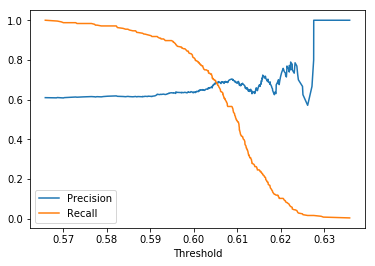

In [17]:
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel('Threshold')
plt.legend()

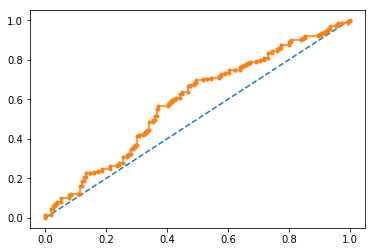

In [18]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test['case_reversed'], probas_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

2)
Scale your n-gram frequencies while maintaining sparsity, as discussed in class. Train an elastic net model to predict log citations to a case (log_cites). Run cross_val_predict() to form model predictions and report a scatter plot of true and predicted values.

In [19]:
# scikit-learn text vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=500,
                        stop_words='english',
                        ngram_range=(1,3))
Xraw = vec.fit_transform(df1['doc'])

In [20]:
# Scaling with Sparsity
from sklearn.preprocessing import StandardScaler
sparse_scaler = StandardScaler(with_mean=False)
X_sparse = sparse_scaler.fit_transform(Xraw)

In [21]:
###
# Elastic Net
###
from sklearn.linear_model import ElasticNetCV
enet_reg = ElasticNetCV(alphas=[.0001, .001, .01,.1,1], 
                        l1_ratio=[.0001, .001, .01,.1,.5,.9, .99, 1])
enet_reg.fit(train[features],train['log_cites'])
enet_reg.alpha_, enet_reg.l1_ratio_

(0.0001, 0.001)

In [22]:
y_pred = cross_val_predict(enet_reg,df1[features], df1['log_cites'], cv=3)

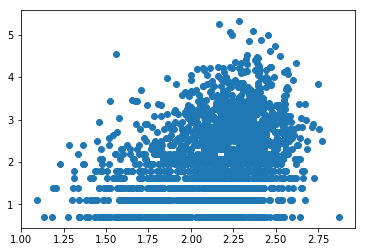

In [23]:
plt.scatter(y_pred,df1['log_cites'])#alpha=.1
plt.show()

3)
Use the judge identifiers (judge_id) to produce the average citations to cases for each judge. Then estimate a two-stage least-squares model with Z as average citations of the judge, X as citations to the case, and Y as whether the case was reversed. Include year fixed effects. Report estimates for coefficient and standard error on X.

In [24]:
#calculate average citations to cases for each judge
df2 = df1.drop_duplicates(subset='judge_id', keep='first').loc[:,['judge_id']]
df2['average_citations']=[df1.loc[df1['judge_id'] == i]['log_cites'].mean() for i in df2['judge_id']]
df2.head()

,judge_id,average_citations
14,150.0,1.039721
26,2159.0,1.422568
28,37.0,1.497866
29,1024.0,0.693147
31,1345.0,3.178054


4)
Train LDA on the cases. Produce word clouds for the topics. Inspect the word clouds for different models to decide on the right number of topics.

In [25]:
text=""
for doc in df1.iloc[:,6]:
    text+=doc

In [26]:
#from sklearn.lda import LDA
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)

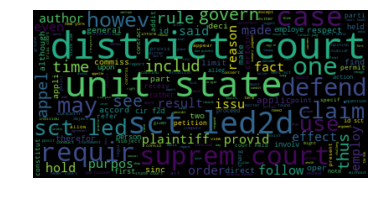

In [27]:
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

5)
Replicate your sklearn logistic regression model (no hidden layers, L2 regularization, and softmax output layer) in Keras or some other deep learning library. Compare performance. Now add two hidden layers, dropout, and batch normalization. Compare performance.

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

X=Xraw.toarray()
Y=df1['case_reversed']

model = Sequential() # create a sequential model
model.add(Dense(10, # output neurons in layer       
          input_dim=X.shape[1], # number of inputs
          kernel_regularizer=regularizers.l2(0.01),
          activity_regularizer=regularizers.l2(0.01),
          activation='relu')) # activation function
model.add(Dense(1, activation='softmax')) # output layer
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 5,021
Trainable params: 5,021
Non-trainable params: 0
_________________________________________________________________


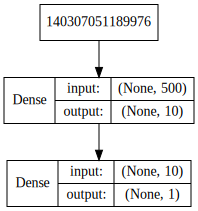

In [29]:
# Visualize a model

# Requires graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
dot = model_to_dot(model,
                   show_shapes=True,
                   show_layer_names=False)
SVG(dot.create(prog='dot', format='svg'))

In [30]:
# fit the model
model.compile(loss='binary_crossentropy', # cost function
              optimizer='adam', # use adam as the optimizer
              metrics=['accuracy']) # compute accuracy, for scoring

model_info = model.fit(X, Y, 
                      epochs=10,
                      validation_split=.2)

Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 3s 2ms/step - loss: 15.7553 - acc: 0.5081 - val_loss: 0.3440 - val_acc: 1.0000
Epoch 2/10
1600/1600 [==============================] - 0s 164us/step - loss: 8.2306 - acc: 0.5081 - val_loss: 0.2807 - val_acc: 1.0000
Epoch 3/10
1600/1600 [==============================] - 0s 169us/step - loss: 8.1406 - acc: 0.5081 - val_loss: 0.2574 - val_acc: 1.0000
Epoch 4/10
1600/1600 [==============================] - 0s 154us/step - loss: 8.1004 - acc: 0.5081 - val_loss: 0.2465 - val_acc: 1.0000
Epoch 5/10
1600/1600 [==============================] - 0s 168us/step - loss: 8.0775 - acc: 0.5081 - val_loss: 0.2395 - val_acc: 1.0000
Epoch 6/10
1600/1600 [==============================] - 0s 185us/step - loss: 8.0626 - acc: 0.5081 - val_loss: 0.2359 - val_acc: 1.0000
Epoch 7/10
1600/1600 [==============================] - 0s 171us/step - loss: 8.0524 - acc

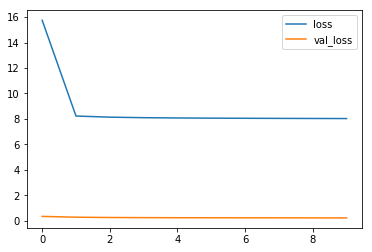

In [31]:
# Plot performance by epoch
plt.plot(model_info.epoch,model_info.history['loss'])
plt.plot(model_info.epoch,model_info.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='best')

In [32]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization


model2 = Sequential() # create a sequential model
model2.add(Dense(5, # output neurons in layer       
          input_dim=X.shape[1], # number of inputs
          activation='relu')) # activation function
model2.add(Dense(5, activation='relu')) # hidden layer
model2.add(BatchNormalization())
model2.add(Dense(5, activation='relu')) # hidden layer
model2.add(Dropout(0.5))                  # dropout
model2.add(Dense(1, activation='softmax')) # output layer
model2.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 2505      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
batch_normalization_1 (Batch (None, 5)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 2,591
Trainab

In [33]:
# Early stopping
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_acc', 
                          min_delta=0.0001, 
                          patience=5, 
                          mode='auto')

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(X, Y, batch_size=32, 
           epochs=100, 
           callbacks=[earlystop], 
           validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 2s 1ms/step - loss: 7.8417 - acc: 0.5081 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/100
1600/1600 [==============================] - 0s 235us/step - loss: 7.8417 - acc: 0.5081 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/100
1600/1600 [==============================] - 0s 268us/step - loss: 7.8417 - acc: 0.5081 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/100
1600/1600 [==============================] - 0s 242us/step - loss: 7.8417 - acc: 0.5081 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/100
1600/1600 [==============================] - 0s 241us/step - loss: 7.8417 - acc: 0.5081 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/100
1600/1600 [==============================] - 0s 224us/step - loss: 7.8417 - acc: 0.5081 - val_loss: 1.1921e-07 - val_acc: 1.0000
